# Question 1 - Tokens, Types & TTR

In [22]:
import nltk

In [23]:
from nltk.tokenize import TweetTokenizer

In [24]:
tknzr = TweetTokenizer()

In [25]:
import pandas as pd

In [26]:
csv_file = pd.read_csv('C:\\Users\\Anup\\Desktop\\tweets-dataset.csv', header=None)

tokens = [] #tokens is list containing lists

for i in range(1, len(csv_file)):
  tokens.append(tknzr.tokenize(csv_file[0][i]))

In [27]:
len_tokens = 0 #total num of tokens in corpus
tokens_arr = [] #list of all tokens 
for i in tokens:
    tokens_arr += i
    len_tokens += len(i)

In [32]:
print "Number of tokens are:",len(tokens_arr)
print "Number of types are:",len(set(tokens_arr))
print "TTR :", float(len(set(tokens_arr)))/len(tokens_arr) #ratio of types to number of tokens

Number of tokens are: 367840
Number of types are: 49112
TTR : 0.133514571553


# Question 2 - Zipf's Law

In [47]:
import random
import math
import numpy as np
from scipy.optimize import curve_fit

In [35]:
from nltk.corpus import wordnet #using wordnet to return meanings

def len_meanings(word): #function which returns number of meanings of word
    synonyms = []
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
    return len(synonyms)

In [96]:
meanings_length = []
word_length = []
types = list(set(tokens_arr)) #list of types

for i in range(20000): #choosing random words from corpus
    
    x = random.choice(types)
    
    word_length.append(math.sqrt(len(x))) #appending square roots of length
    
    meanings_length.append(len_meanings(x)) #appending number of meanings of word

Text(0,0.5,'Number of meanings of word')

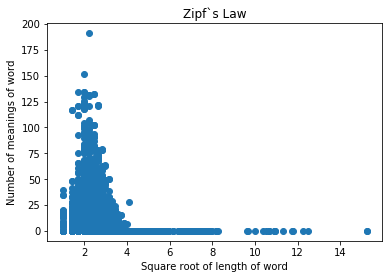

In [97]:
plt.scatter(word_length, meanings_length) #plotting the graph between meanings of word to the root of length of word
plt.title('Zipf`s Law')
plt.xlabel('Square root of length of word')
plt.ylabel('Number of meanings of word')

# Question 3 - Heap's Law

In [41]:
x = [] #Number of tokens
y = [] #Size of vocabulary

for i in range(1, len(tokens_arr),100):
    x.append(i)
    y.append(len(set(tokens_arr[:i])))

In [42]:
import matplotlib.pyplot as plt

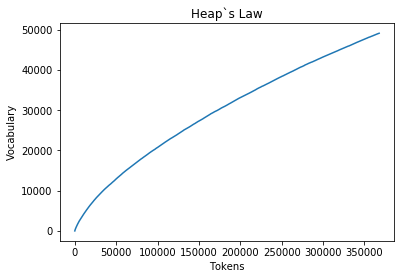

In [44]:
plt.plot(x, y)
plt.title('Heap`s Law')
plt.xlabel('Tokens')
plt.ylabel('Vocabulary')
plt.show()